# Define similarity measures

In [28]:
import numpy as np

def dot_similarity(vector1, vector2):
    return np.sum(np.multiply(np.array(vector1), np.array(vector2)))

def cosine_similarity(vector1, vector2):
    return dot_similarity(vector1, vector2) / np.sqrt(np.sum(vector1)**2 * np.sum(vector2)**2)

# Data tokenization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# ‘english’
def get_boolean_representation(corpus, stop_words_list='english'):
    vectorizer = CountVectorizer(binary=True, stop_words=stop_words_list)
    X = vectorizer.fit_transform(corpus)
    vocabulary = vectorizer.get_feature_names_out()
    return X.toarray(), vocabulary

def get_tf_representation(corpus, stop_words_list='english'):
    vectorizer = CountVectorizer(binary=False, stop_words=stop_words_list)
    X = vectorizer.fit_transform(corpus)
    vectorizer.get_feature_names_out()
    return X.toarray()

def get_tf_idf_representation(corpus, stop_words_list='english'):
    vectorizer = TfidfVectorizer(stop_words=stop_words_list)
    X = vectorizer.fit_transform(corpus)
    vectorizer.get_feature_names_out()
    return X.toarray()

In [30]:
import pandas as pd

df_train = pd.read_csv("../data/DataFrame_train_PREPROCESS.csv")
df_val = pd.read_csv("../data/DataFrame_val_PREPROCESS.csv")

index_train = df_train['index']
index_val = df_val['index']

df = pd.concat([df_train, df_val], ignore_index = True, sort = False)


representation_boolean, vocabulary = get_boolean_representation(df['text'].apply(lambda x : x.lower()))
representation_tf = get_tf_representation(df['text'].apply(lambda x : x.lower()))
representation_tf_idf = get_tf_idf_representation(df['text'].apply(lambda x : x.lower()))

del df

x_train_boolean = representation_boolean[:len(index_train)]
x_val_boolean = representation_boolean[len(index_train):]

x_train_tf = representation_tf[:len(index_train)]
x_val_tf = representation_tf[len(index_train):]

x_train_tf_idf = representation_tf_idf[:len(index_train)]
x_val_tf_idf = representation_tf_idf[len(index_train):]


y_train = df_train['label']
y_val = df_val['label']

del df_val
del df_train

# Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

model = DecisionTreeClassifier(random_state=0).fit(x_train_boolean, y_train)
y_predict = model.predict(x_val_boolean)

acc = accuracy_score(y_val, y_predict)
aucroc = roc_auc_score(y_val, y_predict)

print(acc, aucroc)


0.9275 0.8766573295985061


In [36]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model, x_train_boolean, y_train, feature_names=vocabulary)
viz

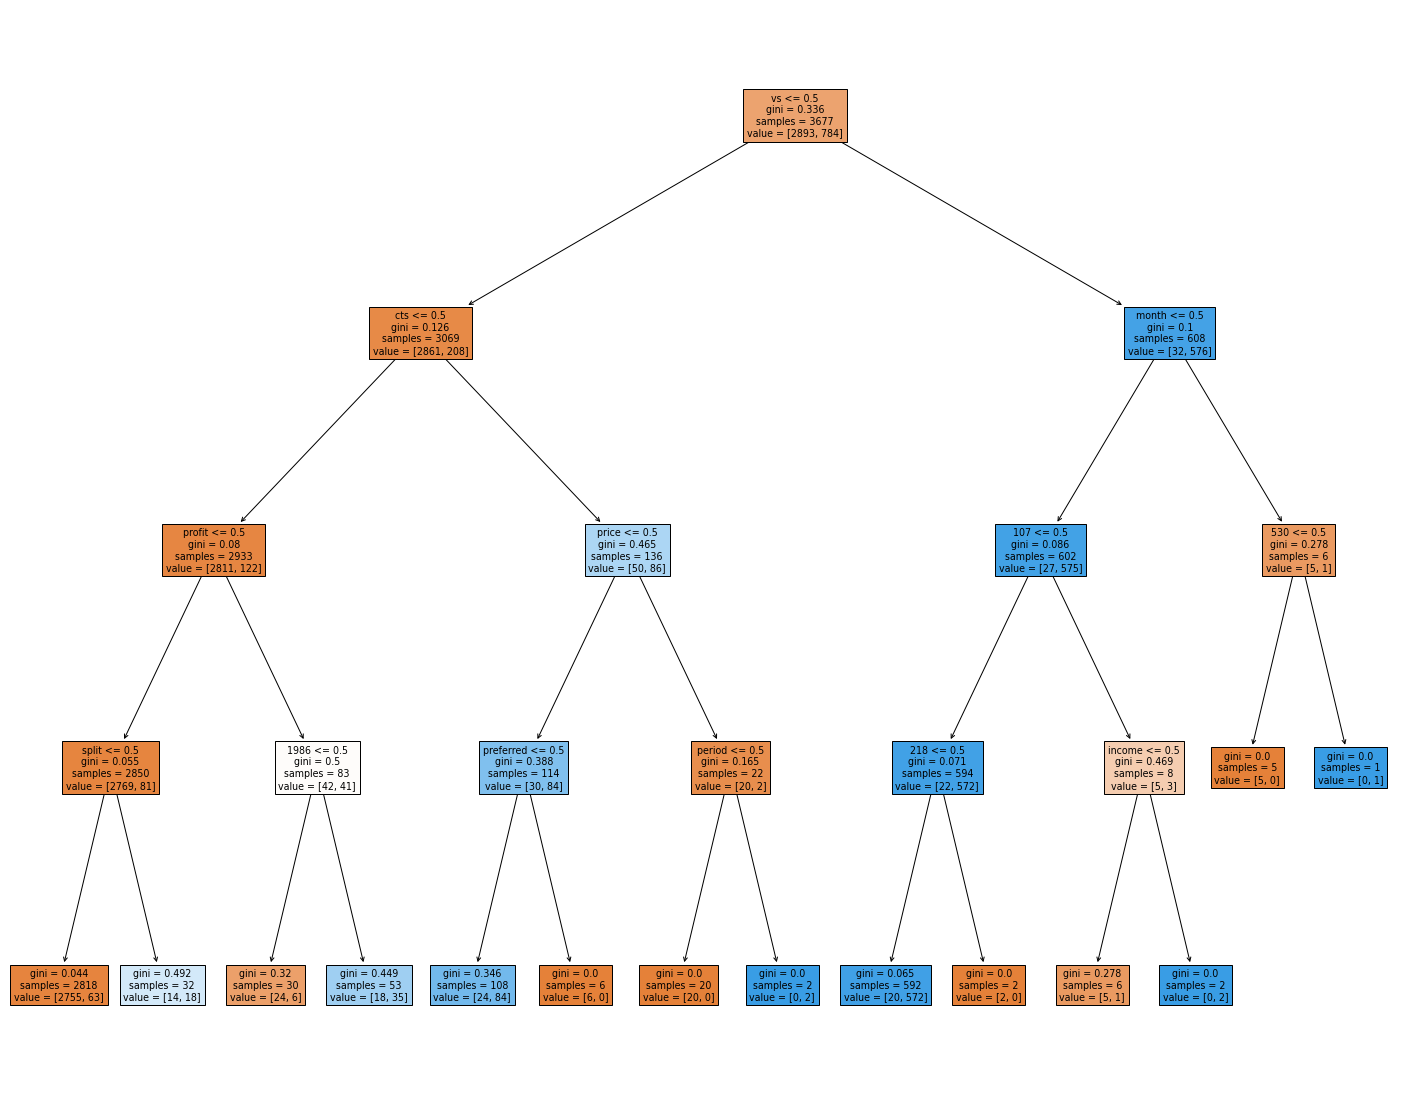

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=vocabulary,
                   filled=True)